## Importing Initial Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## General Overview of Data

In [2]:
df = pd.read_csv(r'C:\Users\jpdvm\Documents\ML_Projects\Emp_Fut_Pred\Employee.csv')
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [3]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
#General descriptive statistics
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [6]:
#Number of employees who did not leave
len(df.loc[df['LeaveOrNot']==0])

3053

In [7]:
#Number of employees who left
len(df.loc[df['LeaveOrNot']==1])

1600

In [8]:
#Taking a look at the unique values in each feature
for feature in df.columns:
    ft = df[feature].unique()
    print(feature,sorted(ft))

Education ['Bachelors', 'Masters', 'PHD']
JoiningYear [2012, 2013, 2014, 2015, 2016, 2017, 2018]
City ['Bangalore', 'New Delhi', 'Pune']
PaymentTier [1, 2, 3]
Age [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Gender ['Female', 'Male']
EverBenched ['No', 'Yes']
ExperienceInCurrentDomain [0, 1, 2, 3, 4, 5, 6, 7]
LeaveOrNot [0, 1]


In [9]:
#Checking the dataset for missing values
def missing (df):
    missing_number = df.isna().sum().sort_values(ascending=False)
    missing_percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [10]:
#We observe no missing values in any feature
missing(df)

,Missing_Number,Missing_Percent
Education,0,0.0
JoiningYear,0,0.0
City,0,0.0
PaymentTier,0,0.0
Age,0,0.0
Gender,0,0.0
EverBenched,0,0.0
ExperienceInCurrentDomain,0,0.0
LeaveOrNot,0,0.0


In [11]:
#Checking the dataset for null values
def null_values(df):
    null_number = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_values = pd.concat([null_number, null_percent], axis=1, keys=['Null_Number', 'Null_Percent'])
    return null_values

In [12]:
##We observe no null values in any feature
null_values(df)

,Null_Number,Null_Percent
Education,0,0.0
JoiningYear,0,0.0
City,0,0.0
PaymentTier,0,0.0
Age,0,0.0
Gender,0,0.0
EverBenched,0,0.0
ExperienceInCurrentDomain,0,0.0
LeaveOrNot,0,0.0


## Data Preprocessing

In [13]:
#Convert each feature into the appropriate format
df["Education"] = df["Education"].astype('category')
df["JoiningYear"] = df["JoiningYear"].astype('category')
df["City"] = df["City"].astype('category')
df["PaymentTier"] = df["PaymentTier"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["EverBenched"] = df["EverBenched"].astype('category')
df["LeaveOrNot"] = df["LeaveOrNot"].astype('category')

In [14]:
df.dtypes

Education                    category
JoiningYear                  category
City                         category
PaymentTier                  category
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                   category
dtype: object

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,5,6])], remainder = 'passthrough')
X = np.array(ct.fit_transform(df))

In [17]:
df_encoded = pd.DataFrame(X)

In [18]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [19]:
df_encoded.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,34.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,3.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,38.0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,27.0,5.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,24.0,2.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,22.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,38.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,34.0,2.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,23.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37.0,2.0,0.0


## Correlation Matrix

<Figure size 1152x720 with 0 Axes>

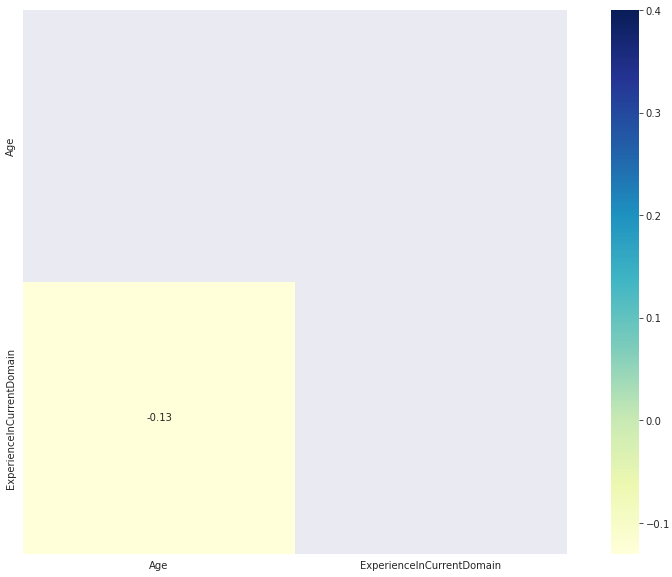

In [20]:
corr_df = df.corr().round(2)
max_corr = 0.4

plt.figure(figsize=(16,10))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_df, mask=mask,vmax=max_corr, square=True, annot=True, cmap="YlGnBu")

In a correlation matrix, any value under 0.4 indicates a low correlation between features. Since no observed correlation value exceeded 0.24, it can be stated that there is no significant correlation between any two features. As such, all features will be included in the training set. In this project, correlation was tested only for numerical features.

## Feature Scaling

In [21]:
#Independent features(excluding the original non-encoded columns)
X = df_encoded.drop(df_encoded.columns[22],axis=1)
#Dependent variable
y = df_encoded[df_encoded.columns[22]]

In [22]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,34.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,3.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,38.0,2.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,27.0,5.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,24.0,2.0


In [23]:
y.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: 22, dtype: float64

In [24]:
#Scaling the numeric features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X.iloc[:,[20,21]] = sc.fit_transform(X.iloc[:,[20,21]])

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.631579,0.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.315789,0.428571
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.842105,0.285714
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.263158,0.714286
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.105263,0.285714


## Dataset Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Splitting our dataset into training and test sets, comprised of 80% and 20% of all data, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [28]:
print(X_train,y_train)

       0    1    2    3    4    5    6    7    8    9   ...   12   13   14  \
3150  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
929   0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
657   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  1.0   
3124  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
72    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4079  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4171  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
599   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
1361  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1547  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       15   16   17   18   19        20        21  
3150  1.0  

In [29]:
print(X_test,y_test)

       0    1    2    3    4    5    6    7    8    9   ...   12   13   14  \
2911  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2182  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
497   1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4283  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1661  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1739  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  1.0   
2352  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3264  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
3172  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1763  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

       15   16   17   18   19        20        21  
2911  1.0  

## Model Training

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,recall_score 

### Logistic Regression

In [31]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [32]:
#Creating a classifier and training it on our data
lg_classifier = LogisticRegression(random_state = 101)
lg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [33]:
#Using the model to make a prediction, given our test set
y_pred_lg = lg_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


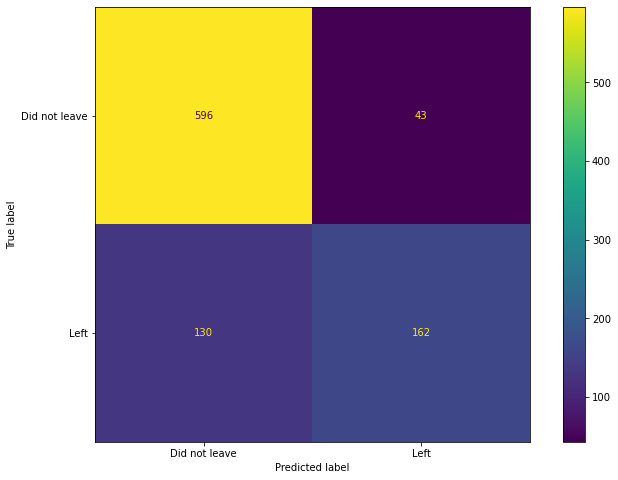

In [149]:
#Generating the confusion matrix
plot_confusion_matrix(lg_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [35]:
#Printing the classification report for the prediction, highlighting the accuracy score
print(classification_report(y_test, y_pred_lg))
accuracy_score(y_test,y_pred_lg)

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       639
         1.0       0.78      0.53      0.64       292

    accuracy                           0.81       931
   macro avg       0.80      0.73      0.75       931
weighted avg       0.80      0.81      0.80       931



0.807733619763695

### K-Nearest Neighbors

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
y_pred_knn = knn_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


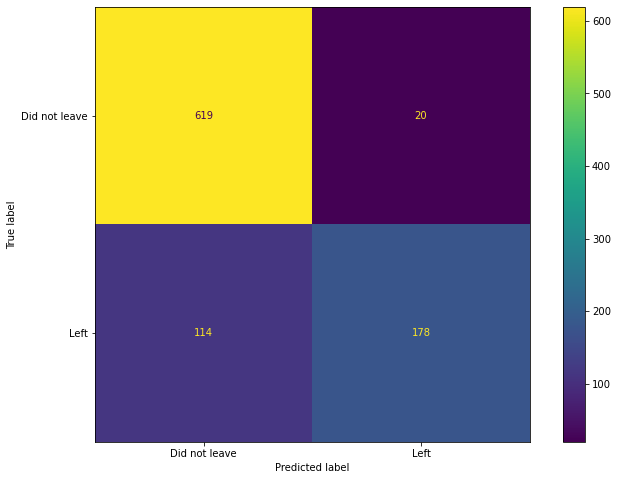

In [147]:
plot_confusion_matrix(knn_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [40]:
print(classification_report(y_test, y_pred_knn))
accuracy_score(y_test,y_pred_knn)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       639
         1.0       0.87      0.60      0.71       292

    accuracy                           0.85       931
   macro avg       0.86      0.78      0.80       931
weighted avg       0.85      0.85      0.84       931



0.8464017185821697

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rdf_classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 101)
rdf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [43]:
y_pred_rdf = rdf_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


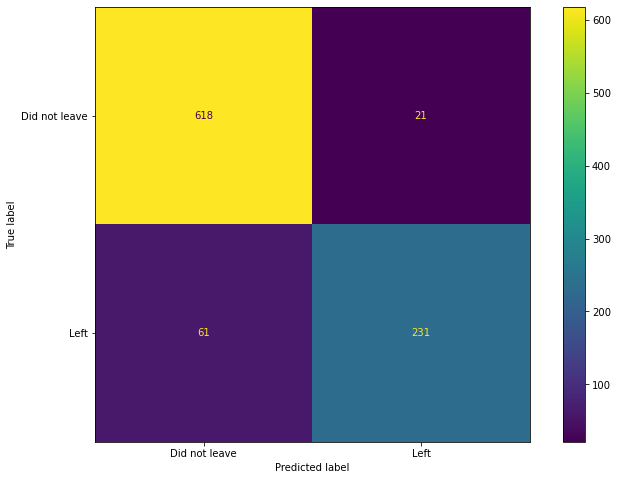

In [148]:
plot_confusion_matrix(rdf_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [45]:
print(classification_report(y_test, y_pred_rdf))
accuracy_score(y_test,y_pred_rdf)

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       639
         1.0       0.78      0.62      0.69       292

    accuracy                           0.83       931
   macro avg       0.81      0.77      0.78       931
weighted avg       0.82      0.83      0.82       931



0.8259935553168636

### Support Vector Machines (SVM)

In [46]:
from sklearn.svm import SVC

In [47]:
svm_classifier = SVC(kernel='linear',random_state=101)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=101)

In [48]:
y_pred_svm = svm_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


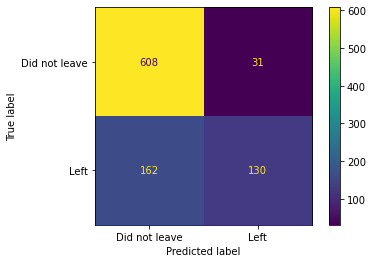

In [49]:
plot_confusion_matrix(svm_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [50]:
print(classification_report(y_test, y_pred_svm))
accuracy_score(y_test,y_pred_svm)

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86       639
         1.0       0.81      0.45      0.57       292

    accuracy                           0.79       931
   macro avg       0.80      0.70      0.72       931
weighted avg       0.80      0.79      0.77       931



0.7926960257787325

### XGBoost

In [51]:
import xgboost as xgb

In [52]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic',missing=np.nan,seed=101,eval_metric='logloss',use_label_encoder=False)

In [53]:
xgb_classifier.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.80719
[1]	validation_0-aucpr:0.81371
[2]	validation_0-aucpr:0.81221
[3]	validation_0-aucpr:0.81401
[4]	validation_0-aucpr:0.81268
[5]	validation_0-aucpr:0.81134
[6]	validation_0-aucpr:0.81943
[7]	validation_0-aucpr:0.82121
[8]	validation_0-aucpr:0.82405
[9]	validation_0-aucpr:0.82236
[10]	validation_0-aucpr:0.82191
[11]	validation_0-aucpr:0.82193
[12]	validation_0-aucpr:0.82166
[13]	validation_0-aucpr:0.82136
[14]	validation_0-aucpr:0.82104
[15]	validation_0-aucpr:0.82029
[16]	validation_0-aucpr:0.81919
[17]	validation_0-aucpr:0.81990


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [54]:
y_pred_xgb = xgb_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


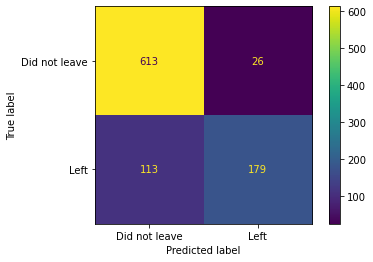

In [55]:
plot_confusion_matrix(xgb_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [56]:
print(classification_report(y_test, y_pred_xgb))
accuracy_score(y_test,y_pred_xgb)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       639
         1.0       0.87      0.61      0.72       292

    accuracy                           0.85       931
   macro avg       0.86      0.79      0.81       931
weighted avg       0.85      0.85      0.84       931



0.8506981740064447

## Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
adb_classifier = AdaBoostClassifier(n_estimators=100,random_state=101)

In [59]:
adb_classifier.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

In [60]:
y_pred_adb = adb_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


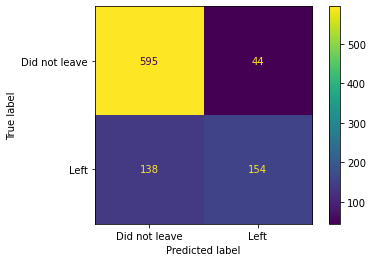

In [61]:
plot_confusion_matrix(adb_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [62]:
print(classification_report(y_test, y_pred_adb))
accuracy_score(y_test,y_pred_adb)

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       639
         1.0       0.78      0.53      0.63       292

    accuracy                           0.80       931
   macro avg       0.79      0.73      0.75       931
weighted avg       0.80      0.80      0.79       931



0.8045112781954887

## Gaussian Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb_classifier = GaussianNB()

In [65]:
gnb_classifier.fit(X_train,y_train)

GaussianNB()

In [66]:
y_pred_gnb = gnb_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


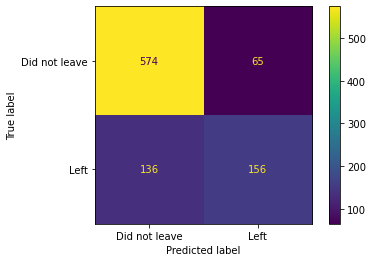

In [67]:
plot_confusion_matrix(gnb_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [68]:
print(classification_report(y_test, y_pred_gnb))
accuracy_score(y_test,y_pred_gnb)

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       639
         1.0       0.71      0.53      0.61       292

    accuracy                           0.78       931
   macro avg       0.76      0.72      0.73       931
weighted avg       0.78      0.78      0.77       931



0.7841031149301826

## Multinomial Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
mnb_classifier = MultinomialNB()

In [71]:
X_train_mnb = X_train
X_test_mnb = X_test

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler_mnb = MinMaxScaler()

In [74]:
scaler_mnb.fit(X_train_mnb)

MinMaxScaler()

In [75]:
X_train_mnb = scaler_mnb.transform(X_train_mnb)
X_test_mnb = scaler_mnb.transform(X_test_mnb)

In [76]:
mnb_classifier.fit(X_train_mnb,y_train)

MultinomialNB()

In [77]:
y_pred_mnb = mnb_classifier.predict(X_test_mnb)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


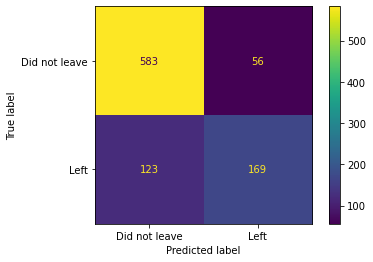

In [78]:
plot_confusion_matrix(mnb_classifier,
                      X_test_mnb,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [79]:
print(classification_report(y_test, y_pred_mnb))
accuracy_score(y_test,y_pred_mnb)

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       639
         1.0       0.75      0.58      0.65       292

    accuracy                           0.81       931
   macro avg       0.79      0.75      0.76       931
weighted avg       0.80      0.81      0.80       931



0.807733619763695

## Bernoulli Naive Bayes

In [80]:
from sklearn.naive_bayes import BernoulliNB

In [81]:
bnb_classifier = BernoulliNB()

In [82]:
bnb_classifier.fit(X_train,y_train)

BernoulliNB()

In [83]:
y_pred_bnb = bnb_classifier.predict(X_test)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


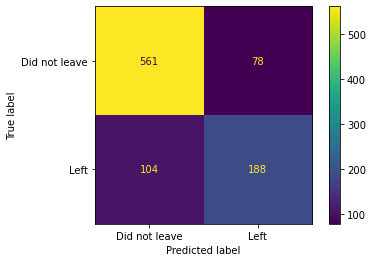

In [84]:
plot_confusion_matrix(bnb_classifier,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [85]:
print(classification_report(y_test, y_pred_bnb))
accuracy_score(y_test,y_pred_bnb)

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       639
         1.0       0.71      0.64      0.67       292

    accuracy                           0.80       931
   macro avg       0.78      0.76      0.77       931
weighted avg       0.80      0.80      0.80       931



0.8045112781954887

##  Parameter Optimization

### Logistic Regression

In [86]:
#Importing GridSearchCV, a tool that determines the optimal parameters for our model via a cross-validated grid search
from sklearn.model_selection import GridSearchCV

In [87]:
#Creating a dictionary containing lists of parameter settings to try as values 
lg_param_grid = [
    {'penalty' : ['l1','l2','elasticnet'],
    'C' : [100,10,1.0,0.1,0.01],
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100,1000,2500,5000]
    }
]

In [88]:
#Implementing GridSearchCV with the logistic regression estimator
lg_clf = GridSearchCV(lg_classifier,lg_param_grid,cv=3,verbose=True,n_jobs=4)

In [89]:
#Fitting our new best classifier to the training data 
lg_best_clf = lg_clf.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [90]:
#Parameters chosen by the search
lg_best_clf.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [91]:
#Accuracy score on the training and test set predictions
print(lg_best_clf.score(X_train,y_train),
lg_best_clf.score(X_test,y_test))

0.8033315421816228 0.807733619763695


### K-Nearest Neighbors

In [92]:
knn_param_grid = {'n_neighbors' : np.arange(1,25)}

In [93]:
knn_clf = GridSearchCV(knn_classifier,knn_param_grid,cv=10)

In [94]:
knn_best_clf = knn_clf.fit(X_train,y_train)

In [95]:
knn_best_clf.best_params_

{'n_neighbors': 8}

In [96]:
print(knn_best_clf.score(X_train,y_train),
knn_best_clf.score(X_test,y_test))

0.8581407845244492 0.8421052631578947


### Random Forest

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10,stop=80,num=10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [98]:
rdf_param_grid = {'n_estimators' : n_estimators,
     'max_features' : max_features,
     'max_depth' : max_depth,
     'min_samples_split' : min_samples_split,
     'min_samples_leaf' : min_samples_leaf,
     'bootstrap' : bootstrap}
print(rdf_param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [99]:
rdf_clf = GridSearchCV(rdf_classifier,rdf_param_grid,cv=3,verbose=2,n_jobs=4)

In [100]:
rdf_best_clf = rdf_clf.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [101]:
rdf_best_clf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [102]:
print(rdf_best_clf.score(X_train,y_train),
rdf_best_clf.score(X_test,y_test))

0.8205265986029017 0.8259935553168636


### Support Vector Machines (SVM)

In [103]:
svm_param_grid = [
    {'C' : [0.1,1,10,100],
    'gamma' : [1,0.1,0.01,0.001],
     'kernel' : ['linear','rbf']
    }
]

In [104]:
svm_clf = GridSearchCV(svm_classifier,svm_param_grid,cv=3,verbose=2,n_jobs=4)

In [105]:
svm_best_clf = svm_clf.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [106]:
svm_best_clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [107]:
print(svm_best_clf.score(X_train,y_train),
svm_best_clf.score(X_test,y_test))

0.8707684040838259 0.849624060150376


### XGBoost

In the case of the XGBoost model, GridSearchCV was run sequentially on subsets of parameter options,in order to optimize parameters in a short amount of time. When applying an XGBoost model on imbalanced data, it is particularly important to choose the best value for the scale_post_weight parameter.

In [108]:
## First iteration
xgb_param_grid1 = {
    'max_depth':[3,6,9,12,15],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
} 
#OUTPUT                  #OUTPUT INTERPRETATION
#{'scale_pos_weight': 1, --Should the value be lower than 1?
 #'reg_lambda': 1.0,     --Best value for reg_lambda
 #'max_depth': 12,       --Best value for max_depth
 #'learning_rate': 0.05, --Should the value be higher than 0.05?
 #'gamma': 1}            --Should the value be higher than 1?

In [109]:
## Second Iteration
xgb_param_grid2 = {
    'max_depth':[12],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'gamma':[1,1.25,1.5],
    'reg_lambda':[1],
    'scale_pos_weight':[0.83,0.84,0.85,0.86,0.87]
} 
#OUTPUT                      #OUTPUT INTERPRETATION
#{'scale_pos_weight': 0.86,  --Best value for scale_pos_weight
 #'reg_lambda': 1,         
 #'max_depth': 12,
 #'learning_rate': 0.05,     --Should the value be somewhere between 0.05 and 1?
 #'gamma': 1.5}              --Should the value be higher than 1.5?

In [110]:
## ROUND N - CHOSEN PARAMETER GRID
xgb_param_gridn = {
    'max_depth':[12],
    'learning_rate':[0.08],
    'gamma':[2.5],
    'reg_lambda':[1],
    'scale_pos_weight':[0.86]
} 

In [111]:
xgb_final_clf = xgb.XGBClassifier(seed=101,
                                  objective='binary:logistic',
                                  gamma=2.5,
                                  learn_rate=0.08,
                                  max_depth=12,
                                  reg_lambda=1,
                                  scale_pos_weight=0.86,
                                  subsample=0.9,
                                  colsample_bytree=0.5)

In [112]:
xgb_final_clf.fit(X_train,
                  y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                  eval_set=[(X_test,y_test)])

[18:03:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.64404
[1]	validation_0-aucpr:0.68515
[2]	validation_0-aucpr:0.74693
[3]	validation_0-aucpr:0.81376
[4]	validation_0-aucpr:0.81130
[5]	validation_0-aucpr:0.81133
[6]	validation_0-aucpr:0.82587
[7]	validation_0-aucpr:0.82970
[8]	validation_0-aucpr:0.82678
[9]	validation_0-aucpr:0.82669
[10]	validation_0-aucpr:0.82418
[11]	validation_0-aucpr:0.82097
[12]	validation_0-aucpr:0.82175
[13]	validation_0-aucpr:0.82324
[14]	validation_0-aucpr:0.82468
[15]	validation_0-aucpr:0.82455
[16]	validation_0-aucpr:0.82473


C:\Users\jpdvm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=2.5, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.08,
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=101, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.86, seed=101, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


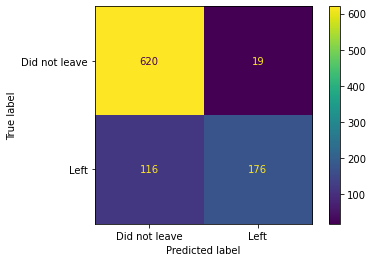

In [113]:
plot_confusion_matrix(xgb_final_clf,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [114]:
print(xgb_final_clf.score(X_train,y_train),
xgb_final_clf.score(X_test,y_test))

0.8640515851692638 0.8549946294307197


In [115]:
y_pred_xgb = xgb_final_clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       639
         1.0       0.90      0.60      0.72       292

    accuracy                           0.85       931
   macro avg       0.87      0.79      0.81       931
weighted avg       0.86      0.85      0.85       931



## Adaboost

In [117]:
adb_param_grid = {
    'n_estimators':[20,30,40,50,60,70,80,90,100],
    'learning_rate':[(0.97 + x / 100) for x in range(0, 8)],
    'algorithm':['SAMME','SAMME.R']
} 

In [118]:
adb_clf = GridSearchCV(adb_classifier,adb_param_grid,cv=5,verbose=2,n_jobs=4)

In [119]:
adb_best_clf = adb_clf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [120]:
adb_best_clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.99, 'n_estimators': 90}

C:\Users\jpdvm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


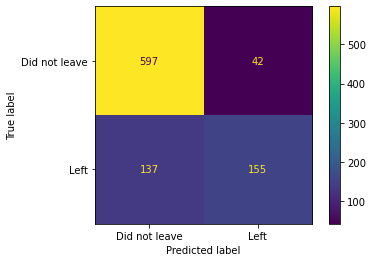

In [121]:
plot_confusion_matrix(adb_best_clf,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=['Did not leave','Left'])

In [122]:
y_pred_adb = adb_best_clf.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       639
         1.0       0.79      0.53      0.63       292

    accuracy                           0.81       931
   macro avg       0.80      0.73      0.75       931
weighted avg       0.81      0.81      0.80       931



## ROC (Receiver Operating Characteristic) Curves

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

### Predicting Probabilities

In [126]:
lg_probs = lg_best_clf.predict_proba(X_test)
knn_probs = knn_best_clf.predict_proba(X_test)
rdf_probs = rdf_best_clf.predict_proba(X_test)
xgb_probs = xgb_final_clf.predict_proba(X_test)
gnb_probs = gnb_classifier.predict_proba(X_test)
mnb_probs = mnb_classifier.predict_proba(X_test)
bnb_probs = bnb_classifier.predict_proba(X_test)

In [127]:
lg_probs = lg_probs[:,1]
knn_probs = knn_probs[:,1]
rdf_probs = rdf_probs[:,1]
xgb_probs = xgb_probs[:,1]
gnb_probs = gnb_probs[:,1]
mnb_probs = mnb_probs[:,1]
bnb_probs = bnb_probs[:,1]

### AUROC Calculation (Area under the ROC curve)

In [128]:
lg_auc = roc_auc_score(y_test,lg_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
rdf_auc = roc_auc_score(y_test,rdf_probs)
xgb_auc = roc_auc_score(y_test,xgb_probs)
gnb_auc = roc_auc_score(y_test,gnb_probs)
mnb_auc = roc_auc_score(y_test,mnb_probs)
bnb_auc = roc_auc_score(y_test,bnb_probs)

### AUROC scores

In [129]:
print('Logistic Regression:AUROC = %.3f' % (lg_auc))
print('K-Nearest Neighbors:AUROC = %.3f' % (knn_auc))
print('Random Forest:AUROC = %.3f' % (rdf_auc))
print('XGBoost:AUROC = %.3f' % (xgb_auc))
print('Gaussian Naive Bayes = %.3f' % (gnb_auc))
print('Multinomial Naive Bayes = %.3f' % (mnb_auc))
print('Bernoulli Naive Bayes = %.3f' % (bnb_auc))

Logistic Regression:AUROC = 0.824
K-Nearest Neighbors:AUROC = 0.816
Random Forest:AUROC = 0.834
XGBoost:AUROC = 0.859
Gaussian Naive Bayes = 0.782
Multinomial Naive Bayes = 0.795
Bernoulli Naive Bayes = 0.792


### ROC Curve Calculation

In [130]:
lg_fpr,lg_tpr,_ = roc_curve(y_test,lg_probs)
knn_fpr,knn_tpr,_ = roc_curve(y_test,knn_probs)
rdf_fpr,rdf_tpr,_ = roc_curve(y_test,rdf_probs)
xgb_fpr,xgb_tpr,_ = roc_curve(y_test,xgb_probs)
gnb_fpr,gnb_tpr,_ = roc_curve(y_test,gnb_probs)
mnb_fpr,mnb_tpr,_ = roc_curve(y_test,mnb_probs)
bnb_fpr,bnb_tpr,_ = roc_curve(y_test,bnb_probs)

### ROC Curve Plotting

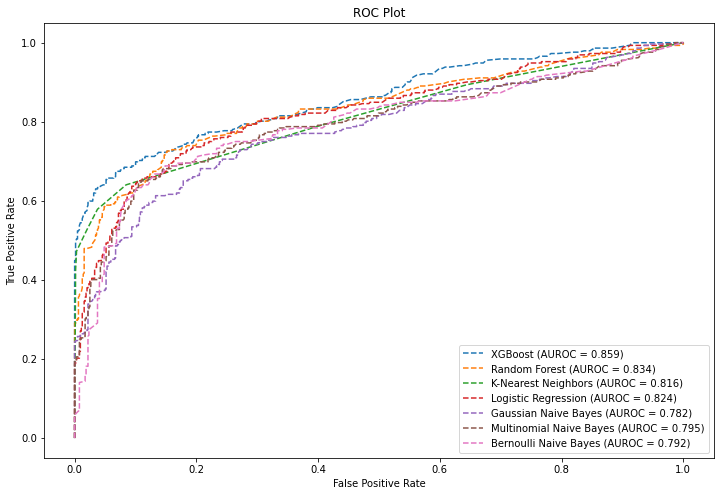

In [150]:
plt.plot(xgb_fpr,xgb_tpr,linestyle='--', label = 'XGBoost (AUROC = %0.3f)' % xgb_auc)
plt.plot(rdf_fpr,rdf_tpr,linestyle='--', label = 'Random Forest (AUROC = %0.3f)' % rdf_auc)
plt.plot(knn_fpr,knn_tpr,linestyle='--', label = 'K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(lg_fpr,lg_tpr,linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' % lg_auc)
plt.plot(gnb_fpr,gnb_tpr,linestyle='--', label = 'Gaussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)
plt.plot(mnb_fpr,mnb_tpr,linestyle='--', label = 'Multinomial Naive Bayes (AUROC = %0.3f)' % mnb_auc)
plt.plot(bnb_fpr,bnb_tpr,linestyle='--', label = 'Bernoulli Naive Bayes (AUROC = %0.3f)' % bnb_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rcParams['figure.figsize']=(12,8)
plt.legend()
plt.show()

It is clear that, since the XGBoost model exhibits the highest ROC AUC score, it is the best performing model of all the models trained on this dataset. As this model is an optimized implementation of the gradient boosted trees algorithm, the random forest model fit the data similarly well.

## Performance Metrics Comparison

In [132]:
lg_ypred = lg_best_clf.predict(X_test)
knn_ypred = knn_best_clf.predict(X_test)
rdf_ypred = rdf_best_clf.predict(X_test)
svm_ypred = svm_best_clf.predict(X_test)
xgb_ypred = xgb_final_clf.predict(X_test)
gnb_ypred = gnb_classifier.predict(X_test)
mnb_ypred = mnb_classifier.predict(X_test)
bnb_ypred = bnb_classifier.predict(X_test)

In [133]:
matrix_data ={'Name':['XGBoost','Random Forest','K-Nearest Neighbors','Logistic Regression',
                      'Gaussian Naive Bayes','Multinomial Naive Bayes','Bernoulli Naive Bayes'],
              
              'Precision':[precision_score(y_test,xgb_ypred),precision_score(y_test,rdf_ypred),
                           precision_score(y_test,knn_ypred),precision_score(y_test,lg_ypred),
                           precision_score(y_test,gnb_ypred),precision_score(y_test,mnb_ypred),
                           precision_score(y_test,bnb_ypred)],
              'Accuracy':[accuracy_score(y_test,xgb_ypred),accuracy_score(y_test,rdf_ypred),
                          accuracy_score(y_test,knn_ypred),accuracy_score(y_test,lg_ypred),
                          accuracy_score(y_test,gnb_ypred),accuracy_score(y_test,mnb_ypred),
                          accuracy_score(y_test,bnb_ypred)],
              'Recall':[recall_score(y_test,xgb_ypred),recall_score(y_test,rdf_ypred),
                        recall_score(y_test,knn_ypred),recall_score(y_test,lg_ypred),
                        recall_score(y_test,gnb_ypred),recall_score(y_test,mnb_ypred),
                        recall_score(y_test,bnb_ypred)],
              'F1 Score':[f1_score(y_test,xgb_ypred),f1_score(y_test,rdf_ypred),
                        f1_score(y_test,knn_ypred),f1_score(y_test,lg_ypred),
                        f1_score(y_test,gnb_ypred),f1_score(y_test,mnb_ypred),
                        f1_score(y_test,bnb_ypred)],
              'ROC Score':[xgb_auc,rdf_auc,knn_auc,lg_auc,gnb_auc,mnb_auc,bnb_auc]
             }

In [134]:
matrix_df = pd.DataFrame(matrix_data)

In [135]:
matrix_df.style.background_gradient(axis=None,cmap='viridis')

,Name,Precision,Accuracy,Recall,F1 Score,ROC Score
0,XGBoost,0.902564,0.854995,0.602740,0.722793,0.859187
1,Random Forest,0.861111,0.825994,0.530822,0.656780,0.834242
2,K-Nearest Neighbors,0.875648,0.842105,0.578767,0.696907,0.815513
3,Logistic Regression,0.783920,0.807734,0.534247,0.635438,0.823603
4,Gaussian Naive Bayes,0.705882,0.784103,0.534247,0.608187,0.782138
5,Multinomial Naive Bayes,0.751111,0.807734,0.578767,0.653772,0.794588
6,Bernoulli Naive Bayes,0.706767,0.804511,0.643836,0.673835,0.792294


The XGBoost model was able to achieve the highest value for accuracy of all the trained models. However, we can see that recall values in general are quite low when compared to precision values. This indicates that, while most positive predictions were indeed correct, many negative predictions were incorrect (high number of false negative predictions). The accuracy score tells us that, in the XGBoost model, approximately 85% of all predictions were correct. Furthermore, the precision score of aproximately 90% indicates that most positive predictions were correct, or in other words, there was a low number of false positive predictions. However, the recall score of 60% tells us that, of the 15% failed predictions, many were false negative predictions (we predicted an employee would not leave, but in reality they did).

Ultimately, these are the most important predictions for this particular use case, since it is crucial for a company to not to misclassify individuals that end up leaving their job.

## SMOTE Oversampling

From the brief initial look at the dataset, we determined that there were 3053 employees that did not resign (0) and 1600 who did (1). This somewhat large inbalance in the number of observations of each class could potentially lead to a lower recall score. As such, a SMOTE oversampling technique was tested to generate samples of employees who left, to balance out the data at the cost of adding redundancy. The tradeoff was then observed.

In [136]:
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter

In [137]:
#ros = RandomOverSampler(random_state=0)
#X_resampled,y_resampled = ros.fit_resample(X_train,y_train)
#print(sorted(Counter(y_resampled).items()),y_resampled.shape)

In [138]:
#X_train = X_resampled
#y_train = y_resampled

The code above was introduced immediately after the dataset split step.

With this method, recall scores increased, while precision and accuracy decreased due to the redundancy introduced. In the case of our XGBoost model, recall increased from 60.3% to 66.8%, while precision and accuracy were reduced from 90.3% to 81.3% and 85.5% to 84.7%, respectively. The overall ROC AUC score decreased from 85.9% to 84.4%. In summary, the increase in recall score was not significant enough to justify the loss of precision and accuracy, such that the redundancy introduced into the data compromised the effectiveness of the model.

## Undersampling 

Despite the small size of our dataset, an undersampling method was also carried out for the purpose of comparison with the previous method.

In [139]:
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter

In [140]:
#rus = RandomUnderSampler(random_state=0)
#X_resampled,y_resampled = rus.fit_resample(X_train,y_train)
#print(sorted(Counter(y_resampled).items()),y_resampled.shape)

In [141]:
#X_train = X_resampled
#y_train = y_resampled

The code above was introduced immediately after the dataset split step.

With a sample of now only 2616 rows, the undersampling method did not yield better results than the previous method. While the recall value in the XGBoost model increased from 60.3% to 67.1%, precision and accuracy decreased from 90.3% to 79.0% and 85.5% to 84.1%, respectively. The overall ROC AUC score was 84.6%, which is lower than the original 85.9%. It is clear that, despite balancing the data without adding redundancy with this method, we are disregarding important information by limiting the model training to a much smaller portion of the dataset, leading to lower overall performance.

## K-Fold Cross Validation

In order to find out if model accuracy varies significantly between training and test data folds, a k-fold cross validator was used. This validator splits the dataset into k randomly sampled training and test set folds, at an 80% to 20% ratio, respectively.

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
i=0

clf_list = [lg_classifier,knn_classifier,rdf_classifier,xgb_classifier,gnb_classifier,bnb_classifier]
clf_name = ['Logistic Regression','K-Nearest Neighbors','Random Forest','XGBoost','Gaussian Naive Bayes','Bernoulli Naive Bayes']

for classifier in clf_list:
    model_accuracy=[]
    model_precision=[]
    model_recall=[]
    print('Classifier: ' + clf_name[i])

    accs = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
    print('Accuracy: {:.2f} %'.format(accs.mean()*100))
    print('Standard Deviation: {:.2f} %'.format(accs.std()*100))
    
    i=i+1

Classifier: Logistic Regression
Accuracy: 80.12 %
Standard Deviation: 1.73 %
Classifier: K-Nearest Neighbors
Accuracy: 83.96 %
Standard Deviation: 1.38 %
Classifier: Random Forest
Accuracy: 82.03 %
Standard Deviation: 1.43 %
Classifier: XGBoost
Accuracy: 84.15 %
Standard Deviation: 2.08 %
Classifier: Gaussian Naive Bayes
Accuracy: 75.90 %
Standard Deviation: 1.54 %
Classifier: Bernoulli Naive Bayes
Accuracy: 78.37 %
Standard Deviation: 2.56 %


We observe that the standard deviation of the accuracy score exhibits a low value for all models, generally not exceeding 2.0%. As such, we conclude that, in this case, model accuracy does not vary significantly between training and test data folds. As such, the XGBoost model continues to be the best performing model among all options tested.

## Stratified K-Fold Cross Validation

Due to the random sampling done in the previous k-fold cross validation, we tested different models on potentially imbalanced data folds, possibly leading to lower predictive accuracy. To ensure that each dataset fold includes the same proportion of observations of each label, a stratified k-fold cross validation was tested.

In [144]:
from sklearn.model_selection import StratifiedKFold

In [145]:
from statistics import mean

In [146]:
i=0
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)

clf_list = [lg_classifier,knn_classifier,rdf_classifier,xgb_classifier,gnb_classifier,bnb_classifier]
clf_name = ['Logistic Regression','K-Nearest Neighbors','Random Forest','XGBoost','Gaussian Naive Bayes','Bernoulli Naive Bayes']
accuracy = [[] for lst in range(len(clf_list))]

for classifier in clf_list:
    print('Classifier: ' + clf_name[i])
    for train_index,test_index in skf.split(X,y):
        #print('Train:', train_index, 'Validation:', test_index)
        X1_train, X1_test = X.iloc[train_index],X.iloc[test_index]
        y1_train, y1_test = y.iloc[train_index],y.iloc[test_index]

        classifier.fit(X1_train,y1_train)
        
        y_pred = classifier.predict(X1_test)
        acc_score = accuracy_score(y_pred,y1_test)
        accuracy[i].append(acc_score)
        
    print('Accuracy: {:.2f} %'.format(mean(accuracy[i])*100))
    print('Standard Deviation: {:.2f} %'.format(np.std(accuracy[i])*100))
    i=i+1

        

Classifier: Logistic Regression
Accuracy: 80.10 %
Standard Deviation: 1.91 %
Classifier: K-Nearest Neighbors
Accuracy: 84.01 %
Standard Deviation: 1.33 %
Classifier: Random Forest
Accuracy: 82.01 %
Standard Deviation: 2.32 %
Classifier: XGBoost
Accuracy: 84.03 %
Standard Deviation: 1.63 %
Classifier: Gaussian Naive Bayes
Accuracy: 76.98 %
Standard Deviation: 1.00 %
Classifier: Bernoulli Naive Bayes
Accuracy: 78.87 %
Standard Deviation: 1.41 %


This stratified train-test split should result in values that better describe the accuracy and standard deviation of each model on our imbalanced dataset.

## Conclusions

The XGBoost model performed well in terms of precision and accuracy. However, due to the data imbalance, the recall value was lower than expected. Possible improvements to this dataset could consist of optimizing feature selection to include more relevant features or expanding the dataset by adding more rows of data.